# First steps with seisbench

https://github.com/seisbench/seisbench

In [1]:
# Install seisbench + pytorch-CPU + other helpful things
# NOTE: will create 'seisbench' python kernel to run this notebook
!mamba env create


CondaValueError: prefix already exists: /srv/conda/envs/seisbench



# Model API

https://colab.research.google.com/github/seisbench/seisbench/blob/main/examples/01b_model_api.ipynb#scrollTo=64a80d07

In [1]:
import seisbench
import seisbench.models as sbm

In [3]:
# keep track of versions
print(seisbench.__version__)

0.1.10


In [4]:
model = sbm.GPD()
print(model)

Component order:	ZNE
SeisBench model		GPD

GPD(
  (conv1): Conv1d(3, 32, kernel_size=(21,), stride=(1,), padding=(10,))
  (bn1): BatchNorm1d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(32, 64, kernel_size=(15,), stride=(1,), padding=(7,))
  (bn2): BatchNorm1d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(64, 128, kernel_size=(11,), stride=(1,), padding=(5,))
  (bn3): BatchNorm1d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv1d(128, 256, kernel_size=(9,), stride=(1,), padding=(4,))
  (bn4): BatchNorm1d(256, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=6400, out_features=200, bias=True)
  (bn5): BatchNorm1d(200, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (bn6): BatchNorm1d(200, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)

In [5]:
import torch

x = torch.rand(1, 3, 400)  # 1 example, 3 components, 400 samples
model.eval()
with torch.no_grad():
    print(model(x))

tensor([[0.3555, 0.3272, 0.3173]])


In [6]:
print(torch.__version__)

1.10.0


In [7]:
pretrained_weights = sbm.GPD.list_pretrained(details=True)
for key, value in pretrained_weights.items():
    print(f"{key}:\n{value}\n-----------------------\n")

dummy:
Randomly initialized model without any training. Just for debug purpose.

Jannes Münchmeyer (munchmej@gfz-potsdam.de)
-----------------------

ethz:
Model trained on ETHZ for 100 epochs with a learning rate of 0.001.
Threshold selected for optimal F1 score on in-domain evaluation. Depending on the target region, the thresholds might need to be adjusted.
When using this model, please reference the SeisBench publications listed at https://github.com/seisbench/seisbench

Jannes Münchmeyer, Jack Woollam (munchmej@gfz-potsdam.de, jack.woollam@kit.edu)
-----------------------

geofon:
Model trained on GEOFON for 100 epochs with a learning rate of 0.001.
Threshold selected for optimal F1 score on in-domain evaluation. Depending on the target region, the thresholds might need to be adjusted.
When using this model, please reference the SeisBench publications listed at https://github.com/seisbench/seisbench

Jannes Münchmeyer, Jack Woollam (munchmej@gfz-potsdam.de, jack.woollam@kit.edu)
-

In [8]:
model = sbm.GPD.from_pretrained("original")
print(model.weights_docstring)

Original GPD model from Ross et al. (2018). Originally published under MIT License. Original available at https://github.com/interseismic/generalized-phase-detection/blob/ea81ef17d204797de6a99d277fd2b9407fc77df7/model_pol_best.hdf5 . 

Converted to SeisBench by Jannes Münchmeyer (munchmej@gfz-potsdam.de)


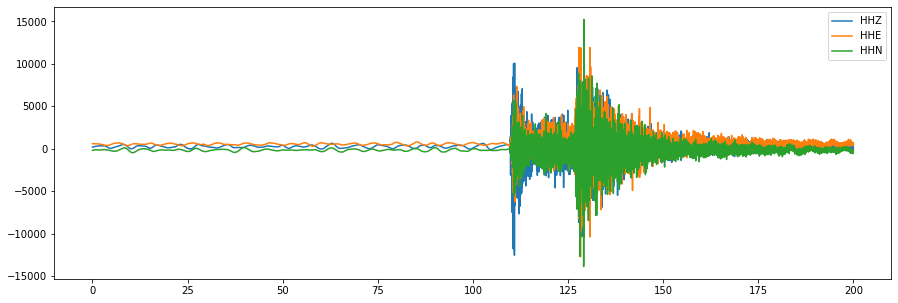

In [9]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

client = Client("GFZ")

t = UTCDateTime("2007/01/02 05:48:50")
stream = client.get_waveforms(network="CX", station="PB01", location="*", channel="HH?", starttime=t-100, endtime=t+100)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
for i in range(3):
    ax.plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
ax.legend();